In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4.5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [25]:
from sklearn.ensemble import RandomForestRegressor
#use regressor for numerical values, and classifier for string labels

# use RF on every var as y, sum up importance across rows
# for city, province and region, make them mutually exclusive when fitting
# column is the Y value used

data1 = pd.read_csv("OutliersRemoved2.csv")
data1 = data1.drop(data1.columns[[0,3,5,6]],axis = 1)
# remove chinese name, province key,region key, year
features = data1.describe()
locations = ['City/province name (EN)','Province','Region']

# imputation by subbing with mean on data
for i in list(data1):
    # cannot impute non-numerical data
    if i not in locations:
        data1[i] = data1[i].fillna(features[i].loc["mean"])
    
# shuffle 
data1 = shuffle(data1, random_state = 0)

# one importance for regression, one for classificatoin
reg_imp = pd.DataFrame(data =0,index = data1.columns,columns = data1.columns)
class_imp = pd.DataFrame(data =0,index = data1.columns,columns = data1.columns)

num_est = 1000

In [26]:
rf2 = RandomForestRegressor(n_estimators=num_est)

# drop the non-numericals
X = data1.drop(locations,axis=1)

for y in list(X):
    Y3 = X[y]
    X3 = X.drop(y, axis =1)
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.15, random_state = 0)    
    rf2.fit(X3_train, Y3_train)
    run = rf2.feature_importances_ 

    d = dict(zip(X3.columns,run))
    for x in X3.columns:
        reg_imp.loc[x,y] = d[x]

In [27]:
# unlooped for the three non-numerical to improve runtime
rf2 = RandomForestClassifier(n_estimators=num_est)

#predict city
Y4 = data1["City/province name (EN)"]
X4 = data1.drop(['Province','Region','City/province name (EN)'],axis=1)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.15, random_state = 0)
rf2.fit(X4_train, Y4_train)
run = rf2.feature_importances_ 

In [28]:
# paste information into importances df
d = dict(zip(X4.columns,run))
for x in X4.columns:
    class_imp.loc[x,"City/province name (EN)"] = d[x]


In [29]:
# predict provinces
Y4 = data1["Province"]
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.15, random_state = 0)
rf2.fit(X4_train, Y4_train)
run = rf2.feature_importances_ 

In [30]:
# paste information into importances df
d = dict(zip(X4.columns,run))
for x in X4.columns:
    class_imp.loc[x, "Province" ] = d[x]


In [31]:
# predict region
Y4 = data1["Region"]
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.15, random_state = 0)
rf2.fit(X4_train, Y4_train)
run = rf2.feature_importances_ 

In [32]:
# paste information into importances df
d = dict(zip(X4.columns,run))
for x in X4.columns:
    class_imp.loc[x,"Region"] = d[x]


In [33]:
# sum across rows and place into imp_sum
class_imp_sum = pd.DataFrame(data = class_imp.sum(axis=1),index = data1.columns,columns = ["Importance"])
reg_imp_sum = pd.DataFrame(data = reg_imp.sum(axis=1),index = data1.columns,columns = ["Importance"])

# drop 0 values for classificatoin and regression
class_imp_sum = class_imp_sum.iloc[3:]
reg_imp_sum = reg_imp_sum.iloc[3:]

This is the sum importance chart for classifying city, province and region


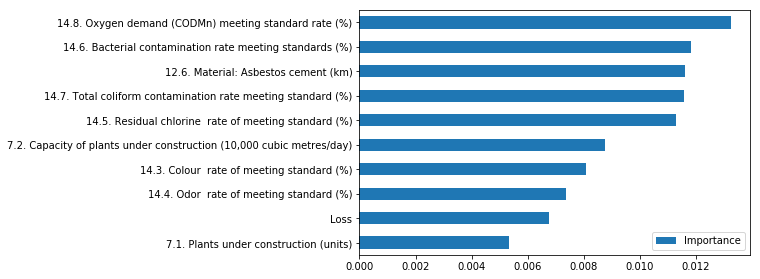

In [34]:
# graph the sums to show which features are the most important for variation
# graph the 3 classifiers and the top 10 regressors separately

# 3 classifiers
classifiers = class_imp_sum.sort_values( [ 'Importance' ] , ascending = True )
classifiers[:10].plot( kind = 'barh' )
print("This is the sum importance chart for classifying city, province and region")

This is the sum importance chart for regressing the other numerical features


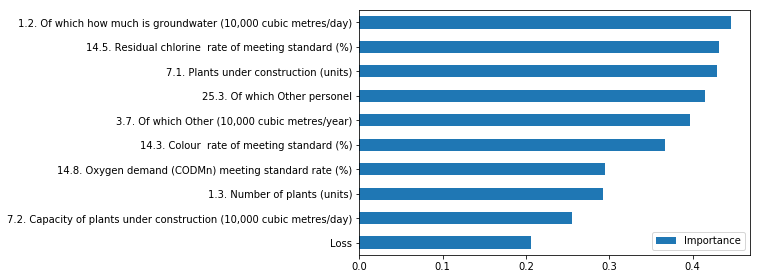

In [35]:
# top 10 regressors
regressors = reg_imp_sum.sort_values( [ 'Importance' ] , ascending = True )
regressors[:10].plot( kind = 'barh' )
print("This is the sum importance chart for regressing the other numerical features")